# Seaborn

Matplotlib 을 기반으로 다양한 색상 테마와 통계용 차트등을 추가한 시각화 패키지

기본적인 시각화 기능은 Matplotlib, 통계 기능은 Statsmodels 패키지에 의존
    * http://seaborn.pydata.org
    
* set() : 색상, 틱, 스타일 등 그래프의 전반적 스타일을 seaborn 스타일로 변경
* set_style() : 틱 스타일만 변경(darkgrid, whitegrid, dark, white, ticks)
* set_color_code() : 기본 색상을 가리키는 문자열 변경

In [17]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 아래는 주피터 노트북에서 한글 폰트 꺠지는 이슈 때문에 별도로 따로 불러옴
import matplotlib.font_manager as fm

In [15]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

plt.rc('font', family='HCR Dotum')
plt.rc('axes', unicode_minus=False)

print("Seaborn version : ", sns.__version__)

Seaborn version :  0.9.0


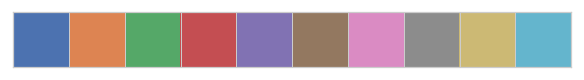

In [7]:
current_palette = sns.color_palette() # 현재 색상 팔레트
sns.palplot(current_palette)

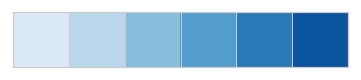

In [9]:
sns.palplot(sns.color_palette("Blues"))

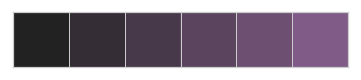

In [12]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

In [13]:
df=pd.read_csv("C:/Users/Affinity/Downloads/Python_Data/ch02_data/APTData.csv", header=0,
              skiprows=7, index_col=None, encoding="utf-8")
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


##### 막대그래프

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


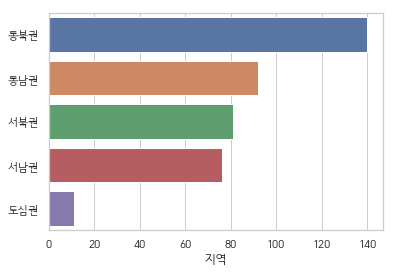

In [20]:
AreaTbl = pd.value_counts(df["Area"])
print(AreaTbl)

# 막대 그래프
sns.barplot(x=AreaTbl, y=AreaTbl.index, orient="h")
plt.xlabel("지역")
plt.show()

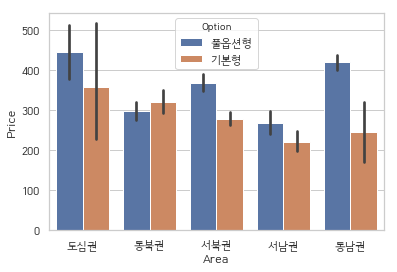

In [21]:
sns.barplot(x="Area", y="Price", hue="Option", data=df)

##### 상자 그래프

메소드 옵션
    * orient : 상자 그래프 방향
        * h : 수평
        * v : 수직
    * fliersize : 이상점 크기

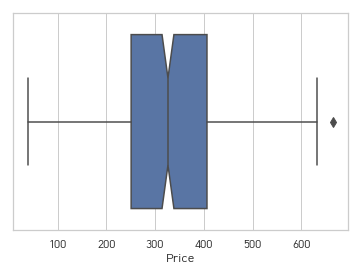

In [26]:
sns.boxplot(x="Price", data=df, orient="h", fliersize=7.5, notch=True, whis=1.5)

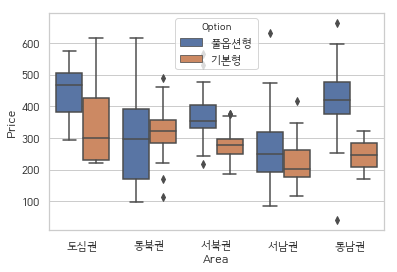

In [27]:
sns.boxplot(x="Area", y="Price", hue="Option", data=df)

##### 히스토그램, 밀도 곡선

메소드 옵션
    * hist : 히스토그램 작성여부
    * kde : 커널 밀도곡선 작성여부
    * rug : x축에 rug 추가
    * vertical : 수직방향 또는 수평방향

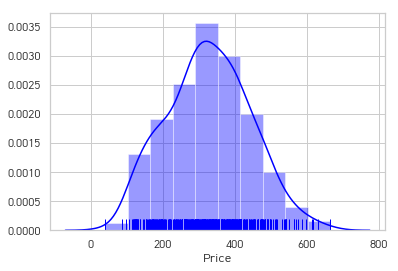

In [36]:
# 히스토그램 + 커널 밀도곡선

sns.distplot(df.Price, bins=10, hist=True, kde=True, rug=True, vertical=False, color="Blue")

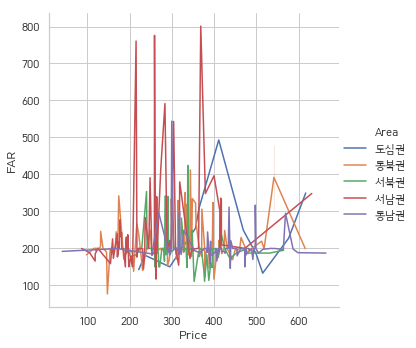

In [31]:
# 산점도 - scatter, line 형 그래프들을 만들 수 있음.

sns.relplot(x="Price", y="FAR", hue="Area", data=df, kind="line")

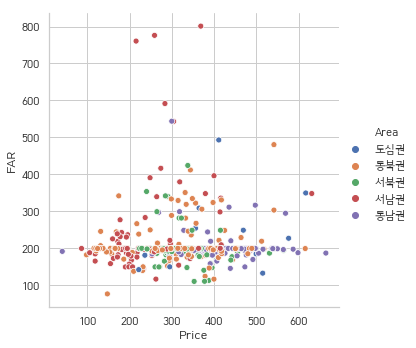

In [32]:
sns.relplot(x="Price", y="FAR", hue="Area", data=df, kind="scatter")

In [38]:
df=pd.read_csv("C:/Users/Affinity/Downloads/Python_Data/ch02_data/pilot.csv", header=0,
              skiprows=8, index_col=None, encoding="utf-8")
df=df.replace({"G":
               {1:"엔지니어 수습생",
               2:"파일럿"}})
df.head(5)

'''

pilot.csv index list

G : 집단(1-엔지니어 수습생, 2-파일럿)
X1 : 지능(intelligence)
X2 : 상황설명능력(form relations)
X3 : 동력측정검력계(dynamometer)
X4 : 상세 표시 능력(dotting)
X5 : 지각 기구 좌표와 능력(sensory motor coordination)
X6 : 인내력(perseveration)

'''

,G,X1,X2,X3,X4,X5,X6
0,엔지니어 수습생,121,22,74,223,54,254
1,엔지니어 수습생,108,30,80,175,40,300
2,엔지니어 수습생,122,49,87,266,41,223
3,엔지니어 수습생,77,37,66,178,80,209
4,엔지니어 수습생,140,35,71,175,38,261


##### 산점도와 회귀곡선

산점도와 함께 추정된 회귀직선과 신뢰구간 추가

메소드 옵션
    * hue : 계열(집단) 변수
    * x_jitter, y_jitter : 중복 점 흩어 뿌리기

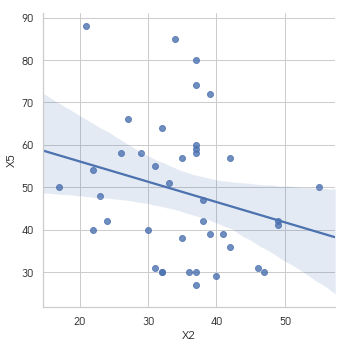

In [40]:
sns.lmplot(x="X2", y="X5", data=df)

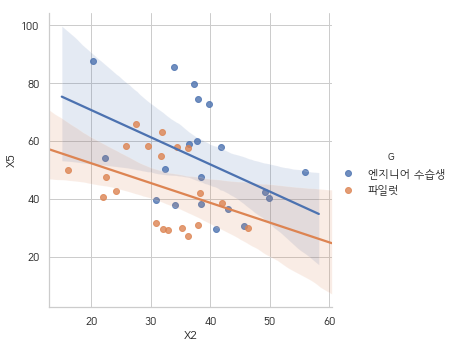

In [42]:
sns.lmplot(x="X2", y="X5", hue="G", data=df, x_jitter=True, y_jitter=True)

##### pairplot

산점도 행렬을 출력함

대각성분은 각 변수의 히스토그램 (커널밀도곡선)

메소드 옵션
    * hue : 계열(집단) 변수
    * kind : 산점도 종류
        * scatter : 산점도
        * reg : 회귀직선 추가
    * diag_kind : 대각성분 종류
        * auto : 자동
        * hist : 히스토그램
        * kde : 커널 밀도 곡선

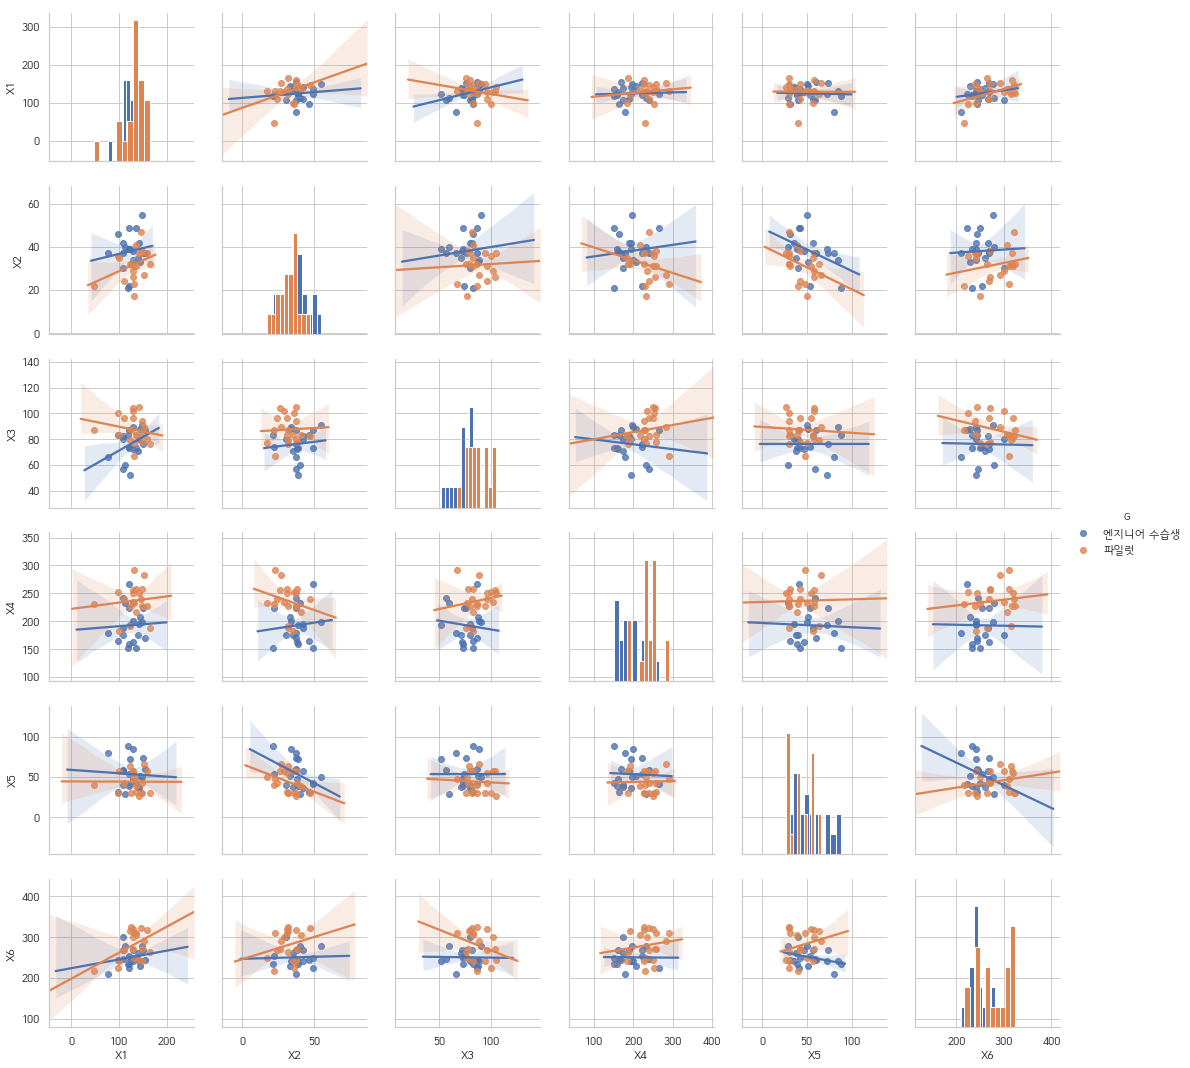

In [43]:
sns.pairplot(data=df, hue="G", kind="reg", diag_kind="hist")

##### jointplot

산점도와 각 축 변수의 히스토그램 및 커널밀도곡선 작성

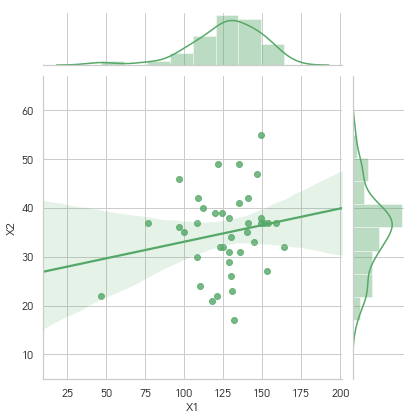

In [44]:
sns.jointplot(x="X1", y="X2", data=df, kind="reg", color="g")

# Plotly

Python 과 Django 프레임워크를 사용하여 제작, 

프론트엔드는 JavaScript와 D3.js, HTML, CSS를 사용하여 제작

파일은 Amazon S3에서 호스팅

Plotly Offline 을 사용하면 그래프를 오프라인으로 생성하고 로컬 HTML로 저장 가능

In [45]:
import plotly.graph_objs as go
import plotly as ply

df=pd.read_csv("C:/Users/Affinity/Downloads/Python_Data/ch02_data/APTData.csv", header=0,
              skiprows=7, index_col=None, encoding="utf-8")
AreaTbl=pd.value_counts(df["Area"])
df.head(5)

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


In [48]:
# 원 그래프

data=[go.Pie(text=AreaTbl.index, values=AreaTbl.values, opacity=0.7)]
layout=go.Layout(title="원 그래프")
figure=go.Figure(data=data, layout=layout) # 그래프 작성
# ply.offline.plot(figure, filename=\
#                 "C:/Users/Affinity/Downloads/Python_Data/ch02_data/plechart2.html")

# 주석 부분을 실행하면 html 파일로 저장되고 원그래프가 실행됨

Figure({
    'data': [{'opacity': 0.7,
              'text': array(['동북권', '동남권', '서북권', '서남권', '도심권'], dtype=object),
              'type': 'pie',
              'uid': 'c4daf15a-155d-4434-af67-e6af917906b7',
              'values': array([140,  92,  81,  76,  11], dtype=int64)}],
    'layout': {'title': {'text': '원 그래프'}}
})

In [49]:
# 막대 그래프

data=[go.Bar(x=AreaTbl.index, y=AreaTbl.values)]
layout=go.Layout(title="막대 그래프")
figure=go.Figure(data=data, layout=layout) # 그래프 작성
# ply.offline.plot(figure, filename=\
#                 "C:/Users/Affinity/Downloads/Python_Data/ch02_data/barchart2.html")

In [52]:
# 상자 그래프

data=[go.Box(x=df.Area, y=df.Price, boxmean=True, fillcolor="yellow", 
             jitter=True, notched=True)]
layout=go.Layout(title="상자 그래프")
figure=go.Figure(data=data, layout=layout) # 그래프 작성
# ply.offline.plot(figure, filename=\
#                 "C:/Users/Affinity/Downloads/Python_Data/ch02_data/boxchart2.html")

In [55]:
# 히스토그램

data=[go.Histogram(x=df.Price, nbinsx=15, opacity=0.5, text="개")]
layout=go.Layout(title="히스토그램")
figure=go.Figure(data=data, layout=layout) # 그래프 작성
# ply.offline.plot(figure, filename=\
#                 "C:/Users/Affinity/Downloads/Python_Data/ch02_data/histogram2.html")

In [57]:
# 산점도

data=[go.Scatter(x=df.Price, y=df.FAR, mode="lines+markers")]
layout=go.Layout(title="산점도")
figure=go.Figure(data=data, layout=layout) # 그래프 작성
ply.offline.plot(figure, filename=\
                "C:/Users/Affinity/Downloads/Python_Data/ch02_data/scatter2.html")

'C:/Users/Affinity/Downloads/Python_Data/ch02_data/scatter2.html'

# Bokeh

웹 브라우저에서 시각화에 효과적인 파이썬 인터랙티브 시각화 라이브러리

plot을 html 파일로 export 해서 웹 브라우저를 통해 확인 가능

IPython Notebook 이랑 호환 잘됨

In [60]:
from bokeh.plotting import figure, output_file, output_notebook, show

output_notebook()

p=figure(title="막대그래프", x_axis_label='x', y_axis_label='y')
p.hbar(y=[1,2,3,4,5], height=0.5, right=AreaTbl.values)

show(p)

Loading BokehJS ...

In [59]:
output_notebook()

p=figure(title="산점도", x_axis_label='x', y_axis_label='y')
p.scatter(x=df.FAR, y=df.Price, marker="square", fill_color="yellow")
show(p)

Loading BokehJS ...

# 그 외 시각화 라이브러리

### Folium

지리적 데이터를 시각화하는데 특화된 라이브러리, leaflet.js 기반

지도 데이터를 사용하는데 선행되어야 하는 작업이 적음, 설치,사용이 간단

http://github.com/python-visualization/folium

### Plotnine

R의 ggplot2에 기반해 그래프를 그려주는 라이브러리

http://plotnine.readthedocs.io/en/stable